In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
##class to perform the momentum update

class momentumU:
    
    def innit(self,mass,gr): ##initializing parameters, Inputs: number of masses added and the gear ratio.
        self.mass = 15+ mass*3.75 ##total mass of the car
        self.numMass = mass #number of masses added
        self.vel = 0 ##velocity [m/s]
        self.angle = 0 ##angle [rad]
        self.position = 0 ##position [m]
        self.normal = self.mass*9.81 #inital normal force
        self.torque = 2 ##stall torque
        self.gr = gr #gear ratio
        
    def normalf(self): ##Calculating normal force as a function of velcity and angle.
        g = 9.81
        n = (self.mass)*9.81*np.cos(self.angle) + (self.mass)*self.vel**2/1.05
        self.normal = n
        return n
    
    def totalF(self): ## Net force on the car based on torque and angle.
        
        
        ##Recreating the torque speed curve of the motor
        
        w = self.gr*(self.vel/(0.125/2))*60 ##converting vehicle speed to motor angular velocity
        
        if (self.gr*(self.vel/(0.125/2))*60 <= 40):
            tor = 2.0 #torque as a functionon of speed
            self.torque = tor
        else:
            tor = w*(-2)/(200-40) + 2
            self.torque = tor #updating torque
        
        #calculating net force
        g = 9.81
        total = -10 - (self.numMass*5) - (self.mass)*g*np.sin(self.angle) + self.torque*self.gr/(0.125/2)
        return total
    
    def MaxFriction(self):##maximum possible frictional force before slippage.
        mass = self.mass
        normal = self.normalf(self) #normal force
        distribution = (15*0.4 + self.numMass*3.75*1)/(15+self.numMass*3.75)
        MaxFriction = normal*1.3*distribution
        
        return MaxFriction

        
    def simulate(self): ## Function to simlate the results
        
        t = np.linspace(0,60,10000) ##time of iteration 
        d = np.zeros(len(t)) #position along the arclength
        v = np.zeros(len(t)) # velocity
        mass = self.mass ##mass in kg

        angle = np.zeros(len(t)) #angle on the circle in rad
        maxFric = np.zeros(len(t)) ## array for the max frictional force possible
        TorqF = np.zeros(len(t)) ## torque force from the wheels at all times [N]
        
        
        for i in range(len(t)-1):
            
            #updating parameters
            F = self.totalF(self) #net force on the car.
            TorqF[i] = self.torque*self.gr/(0.125/2) #torque force.
            maxFric[i] = self.MaxFriction(self) #Max possible friction force before slippage.

            
            ##velocity calculation from momentum change.
            v[i+1] = F*(t[i+1]-t[i])/15 + v[i]
            self.vel = v[i+1]
            
            #distance along the arclength that was traveled
            d[i+1] = d[i]+ v[i+1]*(t[i+1]-t[i])
            self.position = d[i+1]
            
            #updating the angle.
            self.angle = self.position/1.05
            angle[i+1] = self.angle
            
            #Pass-Fail criteria
            if (TorqF[i] > maxFric[i]):
                pf = 'BURN OUT!'
                break
            if(self.vel <= 0):
                pf = "We sliding backwards!"
                break
            if(self.angle >= 45*np.pi/180):
                pf = 'pass'
                break
            else:
                pf = "This shit has stalled on the ramp"
                
        return t,d,v,angle,pf,maxFric,TorqF
    



An angle of 45 degrees corresonds to an arc length of: 0.8246680715673207

 We sliding backwards!
Max angle: 25.555539108165693 º


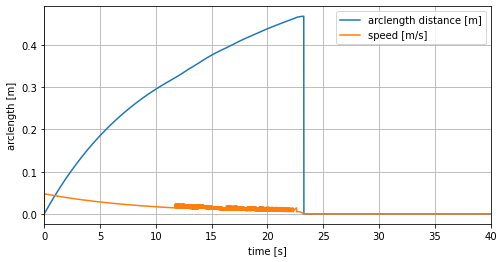

In [5]:
##SIMULATING THE RESULTS

gearR = 2.94 ##CHANGE THIS
numMass = 1 ##Number of masses added to the the rear of the car.

momentumU.innit(momentumU,numMass,gearR) ##inititializing the class. The input value is the gear ratio.

t,d,v,angle,pf,maxFric,TorqF = momentumU.simulate(momentumU) #simulated results.


#plotting results
plt.figure(figsize = [8,4])
plt.plot(t,d,label = 'arclength distance [m]')
plt.plot(t,v,label ='speed [m/s]')
plt.xlabel('time [s]')
plt.ylabel('arclength [m]')
plt.legend()
plt.grid()
plt.xlim(0,40)
# plt.savefig('test with 1 mass',format = 'pdf')

# plt.xlim(20,40) ## uncomment if you want to visualize the velocity stuttering

print('An angle of 45 degrees corresonds to an arc length of:',1.05*45*np.pi/180)
print('\n',pf)
print('Max angle:',max(angle)*180/np.pi,'º')



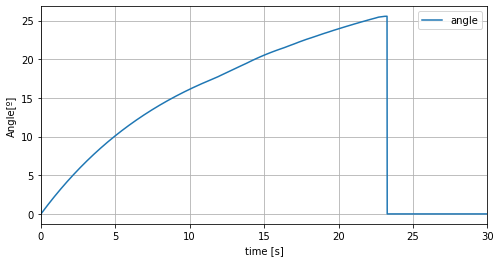

In [6]:
##plotting the angle as a function of time


##plotting the angle[º] as a function of time
plt.figure(figsize = [8,4])
plt.plot(t,angle*180/np.pi,label = 'angle')
plt.xlabel('time [s]')
plt.ylabel('Angle[º]')
plt.legend()
plt.grid()
plt.xlim(0,30)
# plt.savefig("2.94 gear ratio w one mass", format = 'pdf')

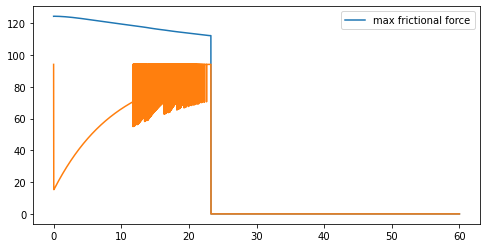

In [7]:
#plot of max frictional force vs torque speed curve


plt.figure(figsize = [8,4])
plt.plot(t,maxFric,label = 'max frictional force')
plt.plot(t,TorqF)
plt.legend()